In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.lines as lines
from functions import get_microm, get_wear_parameters

In [2]:
mask_folder = 'data/tools_mask'
image_folder = 'data/tools_dataset'
wear_folder = 'data/tools_wear_mask'
broken_folder = 'data/tools_broken_mask'

In [3]:
column_names = ['image_name', 'image_path', 'mask_path', 'wear_path', 'broken_path', 'type', 'wear', 'magnification', 'freaser', 'freaser_size']
df = pd.DataFrame(columns = column_names)

for image_name in os.listdir(mask_folder):
    original_path = os.path.join(image_folder, image_name[:-3]+'jpeg')
    mask_path = os.path.join(mask_folder, image_name)
    wear_path = os.path.join(wear_folder, image_name)
    broken_path = os.path.join(broken_folder, image_name)
    if not os.path.exists(broken_path):
        broken_path = np.nan
    if os.path.exists(original_path) and os.path.exists(mask_path) and os.path.exists(wear_path):
        data = image_name[:-4].split('_')
        data = [image_name[:-4], original_path, mask_path, wear_path, broken_path]+data
        df = df.append(dict(zip(column_names,data)), ignore_index=True)
        
df['wear'] = df['wear'].map(lambda wear: float(wear[:-1]))
df['magnification'] = df['magnification'].map(lambda magnification: int(magnification))
df['freaser_size'] = df['freaser_size'].map(lambda f_size: float(f_size[:-2]) if f_size is not np.nan else np.nan )

df.head(150)

,image_name,image_path,mask_path,wear_path,broken_path,type,wear,magnification,freaser,freaser_size
0,V1_0.0m_100_F,data/tools_dataset\V1_0.0m_100_F.jpeg,data/tools_mask\V1_0.0m_100_F.png,data/tools_wear_mask\V1_0.0m_100_F.png,NaN,V1,0.0,100,F,NaN
1,V1_0.0m_1100_F1_0.5mm,data/tools_dataset\V1_0.0m_1100_F1_0.5mm.jpeg,data/tools_mask\V1_0.0m_1100_F1_0.5mm.png,data/tools_wear_mask\V1_0.0m_1100_F1_0.5mm.png,NaN,V1,0.0,1100,F1,0.5
2,V1_0.0m_1100_F2_0.5mm,data/tools_dataset\V1_0.0m_1100_F2_0.5mm.jpeg,data/tools_mask\V1_0.0m_1100_F2_0.5mm.png,data/tools_wear_mask\V1_0.0m_1100_F2_0.5mm.png,NaN,V1,0.0,1100,F2,0.5
3,V1_0.0m_150_F,data/tools_dataset\V1_0.0m_150_F.jpeg,data/tools_mask\V1_0.0m_150_F.png,data/tools_wear_mask\V1_0.0m_150_F.png,NaN,V1,0.0,150,F,NaN
4,V1_0.0m_150_F1_1.0mm,data/tools_dataset\V1_0.0m_150_F1_1.0mm.jpeg,data/tools_mask\V1_0.0m_150_F1_1.0mm.png,data/tools_wear_mask\V1_0.0m_150_F1_1.0mm.png,NaN,V1,0.0,150,F1,1.0
...,...,...,...,...,...,...,...,...,...,...
145,V2_0.4m_300_F2_1.0mm,data/tools_dataset\V2_0.4m_300_F2_1.0mm.jpeg,data/tools_mask\V2_0.4m_300_F2_1.0mm.png,data/tools_wear_mask\V2_0.4m_300_F2_1.0mm.png,data/tools_broken_mask\V2_0.4m_300_F2_1.0mm.png,V2,0.4,300,F2,1.0
146,V2_0.4m_400_F1_0.5mm,data/tools_dataset\V2_0.4m_400_F1_0.5mm.jpeg,data/tools_mask\V2_0.4m_400_F1_0.5mm.png,data/tools_wear_mask\V2_0.4m_400_F1_0.5mm.png,data/tools_broken_mask\V2_0.4m_400_F1_0.5mm.png,V2,0.4,400,F1,0.5
147,V2_0.4m_400_F1_1.0mm,data/tools_dataset\V2_0.4m_400_F1_1.0mm.jpeg,data/tools_mask\V2_0.4m_400_F1_1.0mm.png,data/tools_wear_mask\V2_0.4m_400_F1_1.0mm.png,data/tools_broken_mask\V2_0.4m_400_F1_1.0mm.png,V2,0.4,400,F1,1.0
148,V2_0.4m_400_F2_0.5mm,data/tools_dataset\V2_0.4m_400_F2_0.5mm.jpeg,data/tools_mask\V2_0.4m_400_F2_0.5mm.png,data/tools_wear_mask\V2_0.4m_400_F2_0.5mm.png,data/tools_broken_mask\V2_0.4m_400_F2_0.5mm.png,V2,0.4,400,F2,0.5


In [4]:
df_scale = pd.read_csv('data/scale_metrics.csv')

with open("results/scales_data.tex", "w") as f:
    f.write(df_scale.to_latex())
    
df_scale.head()

,magnification,scale,pixels
0,100,220,200
1,150,320,200
2,200,100,220
3,300,100,330
4,400,50,220


In [5]:
df["wear_microm"] = np.nan
df["broken_microm"] = np.nan
df["vb_microm"] = np.nan
df['vb_max_microm'] = np.nan

In [6]:
for index, row in df.iterrows():   
    wear_image = (cv2.imread(row.wear_path, cv2.IMREAD_GRAYSCALE) /255).astype('int32')
    df.at[index,'wear_microm']=get_microm(wear_image, row.magnification, df_scale)
    
    vb, vb_max, vb_max_x, vb_max_y, vb_base, lines_f, points_f, angle, rotated = get_wear_parameters(wear_image)
    scale = df_scale[df_scale['magnification']==row.magnification].iloc[0]
    df.at[index,'vb_microm']=(vb * scale.scale)/scale.pixels
    df.at[index,'vb_max_microm']=(vb_max * scale.scale)/scale.pixels
    
    if isinstance(row.broken_path, str):
        broken_image = (cv2.imread(row.broken_path, cv2.IMREAD_GRAYSCALE) /255).astype('int32')
        df.at[index,'broken_microm']=get_microm(broken_image, row.magnification, df_scale)

In [7]:
df.to_csv('data/tools_dataset.csv', index=False)

In [8]:
df_filter = df[df.broken_path.notnull()]
print(df_filter.shape)

count = df_filter.groupby(['type', 'freaser_size', 'freaser']).size().reset_index(name="count")
matrix_count = count.pivot(index=['freaser', 'freaser_size'], columns=['type'], values='count').fillna(0).astype(int)
matrix_count.index.name = None

with open("results/count_data.tex", "w") as f:
    f.write(matrix_count.to_latex())

matrix_count.head()

(242, 14)


type                  V1  V2  V3
freaser freaser_size            
F1      0.5            9  15  14
        1.0           27  27  27
F2      0.5           15  15  12
        1.0           27  27  27

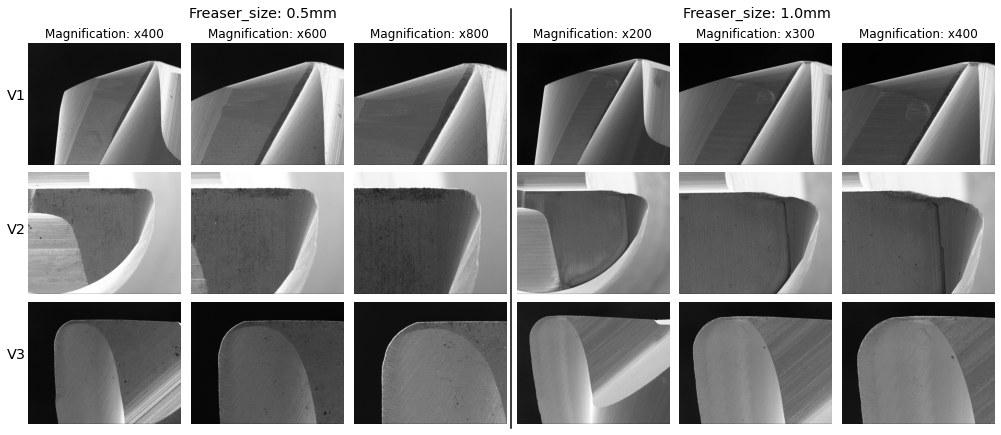

In [9]:
fig, ax = plt.subplots(3,6, figsize=(14,6))

freaser = 'F1'
wear = 0.4

index_row = 0

for type_view in ['V1', 'V2', 'V3']:
    for freaser_size, index_freaser in zip([0.5, 1], range(0,4,3)):
        df_filter = df[(df['type']==type_view) & (df['freaser']==freaser) & (df['freaser_size']==freaser_size) & (df['wear']==wear)]
        index_plot = 0
        for index, row in df_filter.iterrows():
            original_image = cv2.imread(row.image_path)
            ax[index_row][index_plot+index_freaser].imshow(original_image)
            ax[index_row][index_plot+index_freaser].axis('off')
            ax[0][index_plot+index_freaser].title.set_text('Magnification: x'+str(row.magnification))
            index_plot +=1    
    index_row += 1


fig.text(0.01, 0.78, 'V1', size='x-large')#,  rotation='vertical')
fig.text(0.01, 0.47, 'V2', size='x-large')
fig.text(0.01, 0.18, 'V3', size='x-large')

fig.text(0.19, 0.97, 'Freaser_size: 0.5mm', size='x-large')
fig.text(0.68, 0.97, 'Freaser_size: 1.0mm', size='x-large')

fig.add_artist(lines.Line2D([0.51, 0.51], [0.02, 0.99], color='black'))

plt.tight_layout(rect=(0.02,0,1,0.97))  
plt.savefig('results/img_dataset.jpeg', dpi=600)
plt.show()

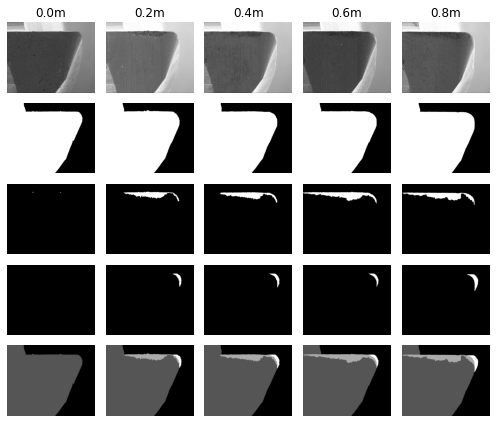

In [10]:
fig, ax = plt.subplots(5,5, figsize=(7,6))

freaser = 'F1'
freaser_size = 0.5
magnification = 600

#index_row= 0
for type_view in ['V2']:
    df_filter = df[(df['type']==type_view) & (df['freaser']==freaser) & (df['freaser_size']==freaser_size) & (df['magnification']==magnification)]
    index_plot = 0
    for index, row in df_filter.iterrows():
        original_image = cv2.imread(row.image_path)
        ax[0][index_plot].imshow(original_image)
        ax[0][index_plot].axis('off')
        ax[0][index_plot].title.set_text(str(row.wear)+'m')
        
        mask_image = cv2.imread(row.mask_path, cv2.IMREAD_GRAYSCALE)//255
        wear_image = cv2.imread(row.wear_path, cv2.IMREAD_GRAYSCALE)//255
        broken_image = cv2.imread(row.broken_path, cv2.IMREAD_GRAYSCALE)//255
               
        final_mask = np.where(wear_image==0, mask_image, 2)
        final_mask = np.where(broken_image==0, final_mask, 3)        
        
        ax[1][index_plot].imshow(mask_image, cmap='gray')
        ax[1][index_plot].axis('off')
        
        ax[2][index_plot].imshow(wear_image, cmap='gray')
        ax[2][index_plot].axis('off')
        
        ax[3][index_plot].imshow(broken_image, cmap='gray')
        ax[3][index_plot].axis('off')
        
        ax[4][index_plot].imshow(final_mask, cmap='gray', vmax=3)
        ax[4][index_plot].axis('off')
        
        index_plot +=1
plt.tight_layout()
plt.savefig('results/img_masks.jpeg', dpi=600)
plt.show()

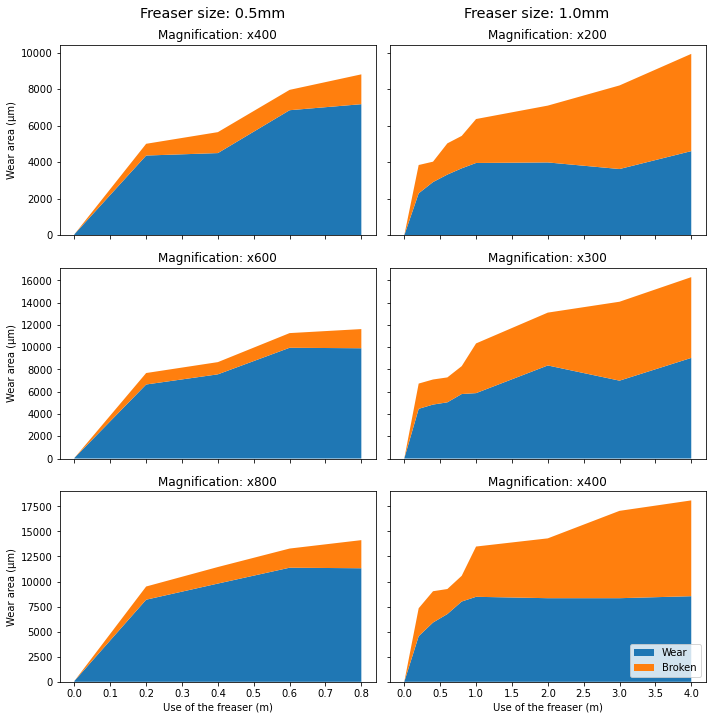

In [11]:
fig, ax = plt.subplots(3,2, figsize=(10,10), sharey='row', sharex='col')


for freaser_size, row in zip([0.5, 1],range(2)):
    index=0
    for magnification in range(200,900,100):
        wear_data =[]
        broken_data =[]
        wear_values = []
        for freaser in ['F1', 'F2']:
            df_filter = df[(df['type']=='V2') & (df['freaser']==freaser) & (df['freaser_size']==freaser_size) & (df['magnification']==magnification)]
            wear_data.append(df_filter.wear_microm.values)
            wear_values.append(df_filter.wear.values)
            broken_data.append(df_filter.broken_microm.values)
            
        wear_mean = [(w1+w2)/2 for w1,w2 in zip(wear_data[0], wear_data[1])]
        broken_mean = [(w1+w2)/2 for w1,w2 in zip(broken_data[0], broken_data[1])]
        
        if len(wear_mean)>2:        
            ax[index][row].stackplot(wear_values[0],(wear_mean,broken_mean), labels=['Wear', 'Broken']) 
            ax[index][row].title.set_text('Magnification: x'+str(magnification))
            ax[2][row].set_xlabel('Use of the freaser (m)')
            index += 1

plt.legend(loc='lower right')
ax[0][0].set_ylabel('Wear area (\u03bcm)')
ax[1][0].set_ylabel('Wear area (\u03bcm)')
ax[2][0].set_ylabel('Wear area (\u03bcm)')

fig.text(0.2, 0.98, 'Freaser size: 0.5mm', size='x-large')
fig.text(0.65, 0.98, 'Freaser size: 1.0mm', size='x-large')

plt.tight_layout(rect=(0,0,1,0.98)) 
plt.savefig('results/img_wear_broken_v2.jpeg', dpi=600)
plt.show()

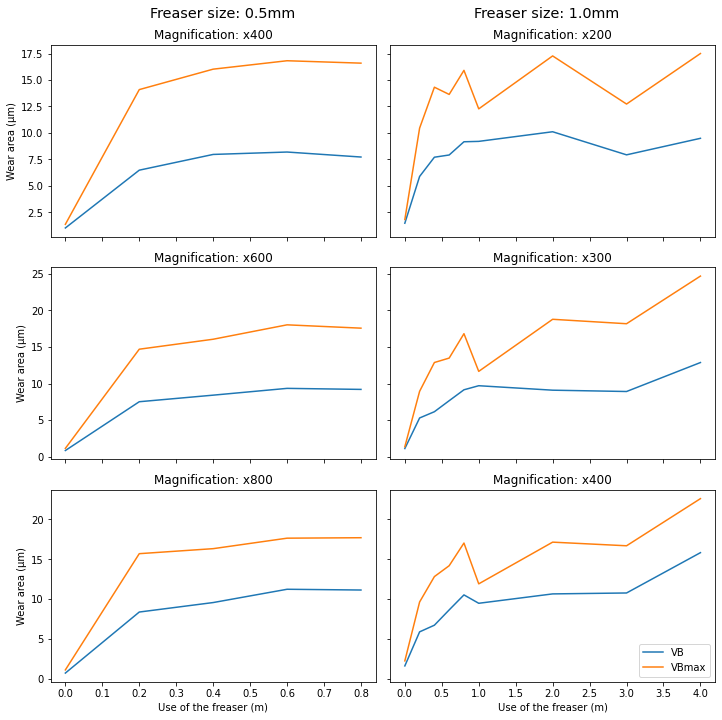

In [12]:
fig, ax = plt.subplots(3,2, figsize=(10,10), sharey='row', sharex='col')


for freaser_size, row in zip([0.5, 1],range(2)):
    index=0
    for magnification in range(200,900,100):
        wear_data =[]
        wear_max_data =[]
        wear_values = []
        for freaser in ['F1', 'F2']:
            df_filter = df[(df['type']=='V2') & (df['freaser']==freaser) & (df['freaser_size']==freaser_size) & (df['magnification']==magnification)]
            wear_data.append(df_filter.vb_microm.values)
            wear_max_data.append(df_filter.vb_max_microm.values)
            wear_values.append(df_filter.wear.values)
            
        wear_mean = [(w1+w2)/2 for w1,w2 in zip(wear_data[0], wear_data[1])]
        wear_max_mean = [(w1+w2)/2 for w1,w2 in zip(wear_max_data[0], wear_max_data[1])]
        
        if len(wear_mean)>2:        
            ax[index][row].plot(wear_values[0],wear_mean, label='VB') 
            ax[index][row].plot(wear_values[0],wear_max_mean, label='VBmax') 
            ax[index][row].title.set_text('Magnification: x'+str(magnification))
            ax[2][row].set_xlabel('Use of the freaser (m)')
            index += 1

plt.legend(loc='lower right')
ax[0][0].set_ylabel('Wear area (\u03bcm)')
ax[1][0].set_ylabel('Wear area (\u03bcm)')
ax[2][0].set_ylabel('Wear area (\u03bcm)')

fig.text(0.2, 0.98, 'Freaser size: 0.5mm', size='x-large')
fig.text(0.65, 0.98, 'Freaser size: 1.0mm', size='x-large')

plt.tight_layout(rect=(0,0,1,0.98)) 
plt.savefig('results/img_vb_broken_v2.jpeg', dpi=600)
plt.show()

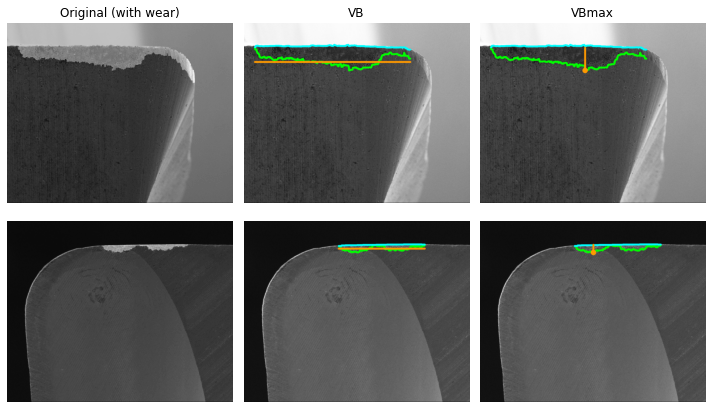

In [13]:
fig, ax = plt.subplots(2,3, figsize=(10,6))

for i, index in zip([152,280], range(2)):
    row = df.loc[i]
    wear_image = (cv2.imread(row.wear_path, cv2.IMREAD_GRAYSCALE) /255).astype('int32')
    input_image = cv2.imread(row.image_path, cv2.IMREAD_GRAYSCALE)

    vb, vb_max, vb_max_x, vb_max_y, vb_base, lines_f, points_f, angle, rotated = get_wear_parameters(wear_image)
    scale = df_scale[df_scale['magnification']==row.magnification].iloc[0]
    vb_micro_m = (vb * scale.scale)/scale.pixels
    vb_max_micro_m = (vb_max * scale.scale)/scale.pixels

    backtorgb = cv2.cvtColor(input_image,cv2.COLOR_GRAY2RGB)
    if rotated:
        (h, w) = backtorgb.shape[:2]
        (cX, cY) = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D((cX, cY), 90+angle, 1.0)
        backtorgb = cv2.warpAffine(backtorgb, M, (w, h))

    vb_image = backtorgb.copy()  
    pts = np.hstack((np.expand_dims(points_f, axis=1),np.expand_dims(lines_f[1], axis=1)))
    a = cv2.polylines(vb_image,[pts],False,(0,255,0),10)
    pts = np.hstack((np.expand_dims(points_f, axis=1),np.expand_dims(lines_f[0], axis=1)))
    a = cv2.polylines(vb_image,[pts],False,(0,255,255),10)
    a = cv2.line(vb_image, (points_f[0],int(vb_base+vb)), (points_f[-1],int(vb_base+vb)), (255, 153, 0), 10)

    vb_max_image = backtorgb.copy() 
    pts = np.hstack((np.expand_dims(points_f, axis=1),np.expand_dims(lines_f[1], axis=1)))
    a = cv2.polylines(vb_max_image,[pts],False,(0,255,0),10)
    pts = np.hstack((np.expand_dims(points_f, axis=1),np.expand_dims(lines_f[0], axis=1)))
    a = cv2.polylines(vb_max_image,[pts],False,(0,255,255),10)
    a = cv2.circle(vb_max_image, (vb_max_y, vb_max_x), 10, (255, 153, 0), 10)
    a = cv2.line(vb_max_image, (vb_max_y,int(vb_base)), (vb_max_y,vb_max_x), (255, 153, 0), 10)

    ax[index][0].imshow(input_image, cmap='gray')
    ax[index][0].axis('off')
    original_mask = cv2.addWeighted(input_image.astype('int32'), 0.7, wear_image*255, 0.3, 0.0)
    ax[index][0].imshow(original_mask, cmap='gray')
    ax[index][0].axis('off')
    ax[index][1].imshow(vb_image)
    ax[index][1].axis('off')
    ax[index][2].imshow(vb_max_image)
    ax[index][2].axis('off')

ax[0][0].title.set_text('Original (with wear)')
ax[0][1].title.set_text('Wear')
ax[0][1].title.set_text('VB')
ax[0][2].title.set_text('VBmax')

plt.tight_layout() 
plt.savefig('results/img_metrics_vb.jpeg', dpi=600)
plt.show()